# <FONT COLOR='red'> NLP REVISION

### Install Libraries

Complete the missing import statements.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)

# fill in function for train test split.
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

# Use the Sequential class. 
from keras.models import Sequential

# Select the correct crossentropy function for the task.
from keras.losses import categorical_crossentropy # fill in answer

from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
 
from numpy import argmax
import numpy as np
import re

import matplotlib.pyplot as plt
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Install Data

1. Load the dataset **'fakenews.txt'** into a Pandas Dataframe.

2. Set the columns names to 'News' and 'Label'.


In [2]:
COLUMN_NAMES=['News','Label']

fake_news = pd.read_table('Fakenews.txt', sep="\t", names=COLUMN_NAMES, header=None)

fake_news.head()

,News,Label
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former...",Fake
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia inve...",Fake
2,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In...",Fake
3,"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Bar...",Fake
4,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned T...,Fake


## Show the first 10 rows of data

In [3]:
fake_news[:10]


,News,Label
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former...",Fake
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia inve...",Fake
2,"On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In...",Fake
3,"On Christmas day, Donald Trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Bar...",Fake
4,Pope Francis used his annual Christmas Day message to rebuke Donald Trump without even mentioning his name. The Pope delivered his message just days after members of the United Nations condemned T...,Fake
5,"The number of cases of cops brutalizing and killing people of color seems to see no end. Now, we have another case that needs to be shared far and wide. An Alabama woman by the name of Angela Will...",Fake
6,"Donald Trump spent a good portion of his day at his golf club, marking the 84th day he s done so since taking the oath of office. It must have been a bad game because just after that, Trump lashed...",Fake
7,"In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the ...",Fake
8,"Many people have raised the alarm regarding the fact that Donald Trump is dangerously close to becoming an autocrat. The thing is, democracies become autocracies right under the people s noses, be...",Fake
9,"Just when you might have thought we d get a break from watching people kiss Donald Trump s ass and stroke his ego ad nauseam, a pro-Trump group creates an ad that s nothing but people doing even m...",Fake


## Show count of each sentiment types

Use value_counts() method.

In [4]:
# Count occurrences of each label
fake_news["Label"].value_counts()

Label
Fake    1000
Real    1000
Name: count, dtype: int64

## Define the classes

1. Assign amazon's sentiment count to a panda series object called 'amazon_counts'

2.  Change 'amazon_counts' index from 0 to 'Negative' and 1 to 'Positive'.

In [5]:
fakenews_counts=fake_news.Label.value_counts().to_frame()
fakenews_counts


,count
Label,
Fake,1000
Real,1000


In [6]:
fakenews_counts.index= ['Negative', 'Positive']
fakenews_counts

,count
Negative,1000
Positive,1000


## Assign X to 'News' and y to 'Label'.

In [7]:
# Features (News text)
X = fake_news['News']

# Labels (Fake/Real or Negative/Positive)
y = fake_news['Label']


## Create the vocabulary of the dataset. 

In [8]:
vocabulary = set()
for data_point in X:
    for word in data_point.split(' '):
        vocabulary.add(word)

vocabulary = list(vocabulary)

## Show the first 5 vocabulary.

In [9]:
#fill in answer
vocabulary[:5]

['', 'law.Donald', 'Minneapolis,', 'Lewandowski.', 'amount.']

In [10]:
len(vocabulary)

60466

## Create Document Vectors

In [11]:
from sklearn.preprocessing import LabelEncoder


vectorizer = CountVectorizer(vocabulary=vocabulary)


X_encoded = vectorizer.transform(X).toarray()

In [12]:
len(X_encoded)

2000

In [13]:
# Use one-hot encoding to dummify y
y_encoded = pd.get_dummies(y).values

y_encoded

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

## Split into train, test sets. 70% for training, 30% for testing. 

1. Use the train_test_split() function. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

In [15]:
len(X_encoded)

2000

In [16]:
len(X_train[1])

60466

In [17]:
len(X_test[0])

60466

In [18]:
len(y_train[0])

2

In [19]:
num_epochs = 60
model = Sequential()
model.add(Dense(units=64, activation='sigmoid',
                input_dim=len(X_train[0])))
# model.add(Dense(units=#fill in answer,
model.add(Dense(units=len(y_train[0]), activation='softmax'))
# model.compile(loss=#fill in answer,
model.compile(loss=categorical_crossentropy,metrics=['acc'],
              optimizer=SGD(learning_rate=0.01,
                            momentum=0.9, nesterov=True))
history=model.fit(np.array(X_train), np.array(y_train), 
                  epochs=num_epochs, 
                  batch_size=16,
                  validation_data=(X_test, y_test),
                  verbose=1)

c:\Users\Gerald Lim\anaconda3\envs\NLP\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.8719 - loss: 0.3352 - val_acc: 0.9817 - val_loss: 0.0764
Epoch 2/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9823 - loss: 0.0645 - val_acc: 0.9833 - val_loss: 0.0565
Epoch 3/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9954 - loss: 0.0289 - val_acc: 0.9733 - val_loss: 0.0720
Epoch 4/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9958 - loss: 0.0242 - val_acc: 0.9817 - val_loss: 0.0479
Epoch 5/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 1.0000 - loss: 0.0103 - val_acc: 0.9850 - val_loss: 0.0416
Epoch 6/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 1.0000 - loss: 0.0089 - val_acc: 0.9833 - val_loss: 0.0414
Epoch 7/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 1.0000 - loss: 0.0070 - val_acc: 0.9850 - val_loss: 0.0401
Epoch 8/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 1.0000 - loss: 0.0055 - val_acc: 0.9850 - val_loss: 0.0401
Epoch 9/60
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 1.0000 - l

## Show the learning curves

1. Loss vs Epoch (training and validation)
2. Accuracy vs Epoch (training and validation)

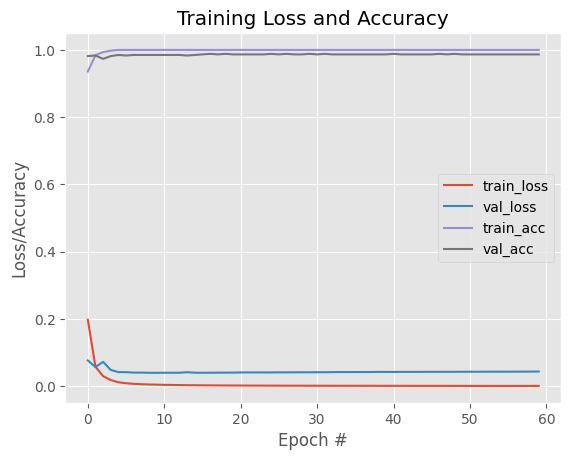

In [20]:
def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
    
  plt.plot(np.arange(0, num_epochs), H.history['loss'], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history['val_loss'], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history['acc'], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history['val_acc'], label="val_acc")
    
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show()

plot_graphs(history,'acc')

## Use model to predict 'X_test'.

In [21]:
preds = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## Use argmax() to get the highest probability class label from preds. 

In [22]:
preds=[argmax(each) for each in preds]

## Use argmax() to get the class label from y_test.



In [23]:
y_test_cm= [argmax(each) for each in y_test]

## Show Confusion Matrix 

Use sklearn's confusion_matrix function to create a confusion matrix. 

With the confusion matrix, create a pandas dataframe with columns called 'Negative' and 'Positive', and the index as 'Negative', 'Positive' as well.

In [24]:
cm = confusion_matrix(y_test_cm, preds)
df_cm = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
df_cm.head()

,Negative,Positive
Negative,297,5
Positive,3,295


## Show Classification Report

In [25]:
print(classification_report(y_test_cm, preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       302
           1       0.98      0.99      0.99       298

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



# Question 1: Suggest **ONE** way in terms of cleaning the data to improve model accuracy.


**Answer:** 
